In [13]:
# laod data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
# sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [14]:
heartdisease_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [15]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)



In [16]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# X_pca = PCA(n_components=2).fit_transform(X_std)


pca = PCA(n_components=2).fit_transform(X_std)

# 1.
#### Apply GMM to the heart disease data by setting n_components=2. Get ARI and silhoutte scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the assignments of the previous checkpoints. Which algorithm does perform better?

K = 2, ARI = 0.4380857727169879
K = 2, silhouette coefficient = 0.17530682286260937


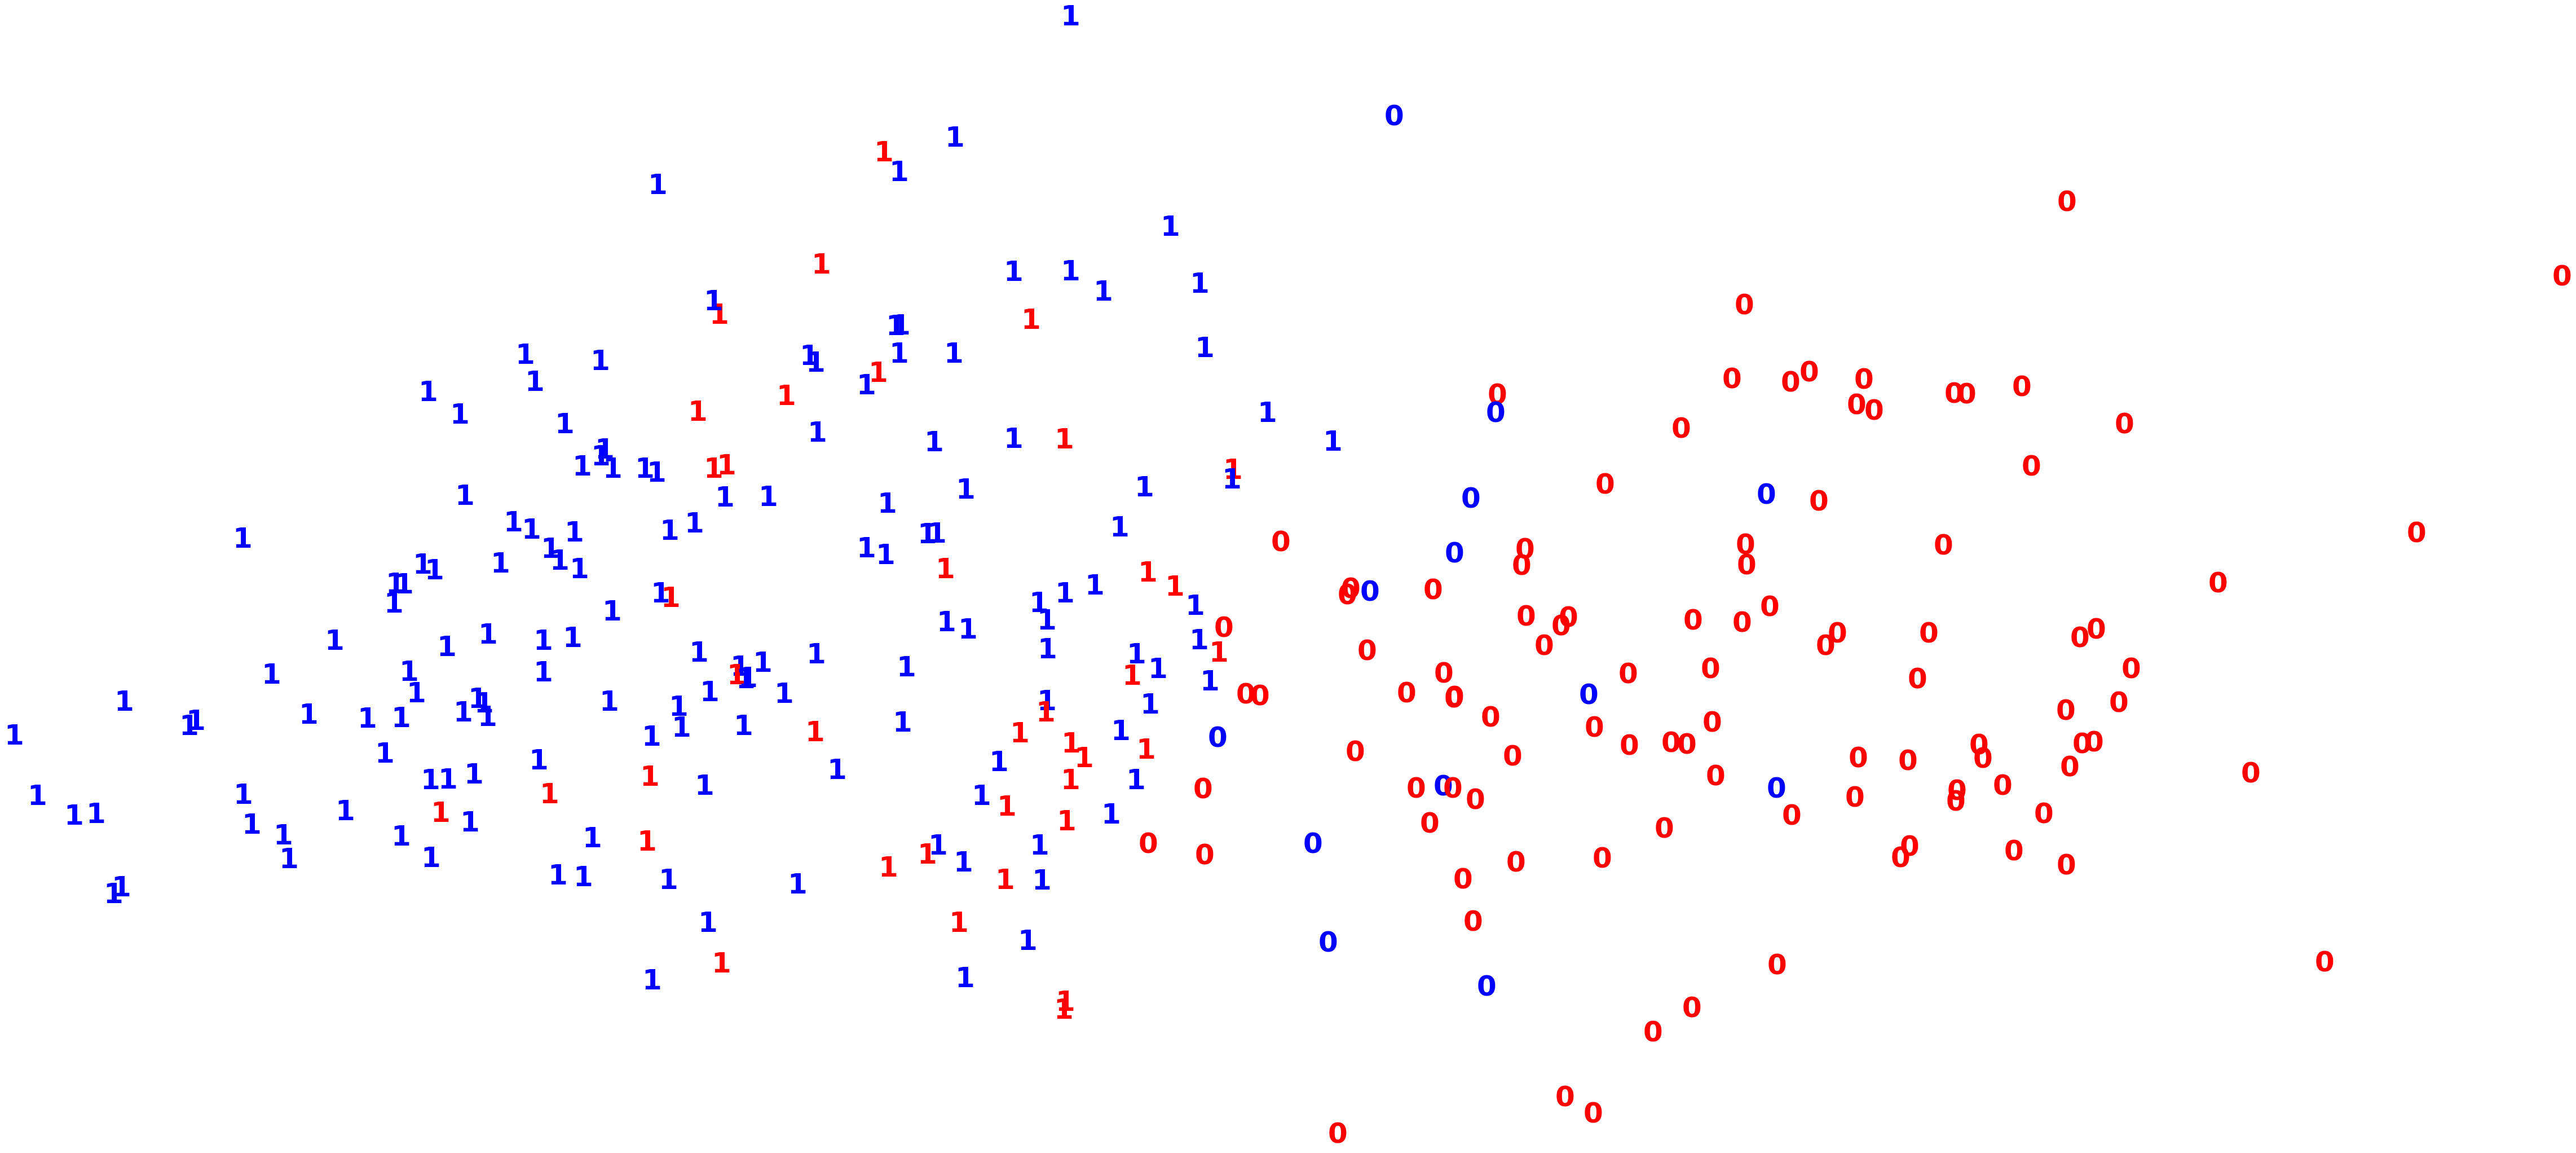

In [21]:
# k-means result
from sklearn import metrics
# X_std
# y 


# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

kmeans_cluster.fit(X_std)
full_pred = kmeans_cluster.predict(X_std)    

print("K = {}, ARI = {}".format(2, metrics.adjusted_rand_score(y, full_pred)))
print("K = {}, silhouette coefficient = {}".format(2, metrics.silhouette_score(X_std, full_pred, metric='euclidean')))


plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(full_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


In [18]:
# Aggcluster results
# from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

for linkage in ["complete", "average", "ward"]:
    # Defining the agglomerative clustering
    if linkage != "ward":
        agg_cluster = AgglomerativeClustering(linkage=linkage, 
                                          affinity='cosine',
                                          n_clusters= 2)
    else:
        agg_cluster = AgglomerativeClustering(linkage=linkage, 
                                          affinity='euclidean',
                                          n_clusters= 2)

    # Fit model
    full_pred = agg_cluster.fit_predict(X_std)
#     full_pred = kmeans_cluster.predict(X_std)
    

    print("linkage = {}, ARI = {}".format(linkage, metrics.adjusted_rand_score(y, full_pred)))
    print("linkage = {}, silhouette coefficient = {}".format(linkage, metrics.silhouette_score(X_std, full_pred, metric='euclidean')))
    print("\n")

    

linkage = complete, ARI = 0.21394030618551016
linkage = complete, silhouette coefficient = 0.11730765444448985


linkage = average, ARI = 0.2940490133353465
linkage = average, silhouette coefficient = 0.14837359969689895


linkage = ward, ARI = 0.146129913123814
linkage = ward, silhouette coefficient = 0.1387197366557222




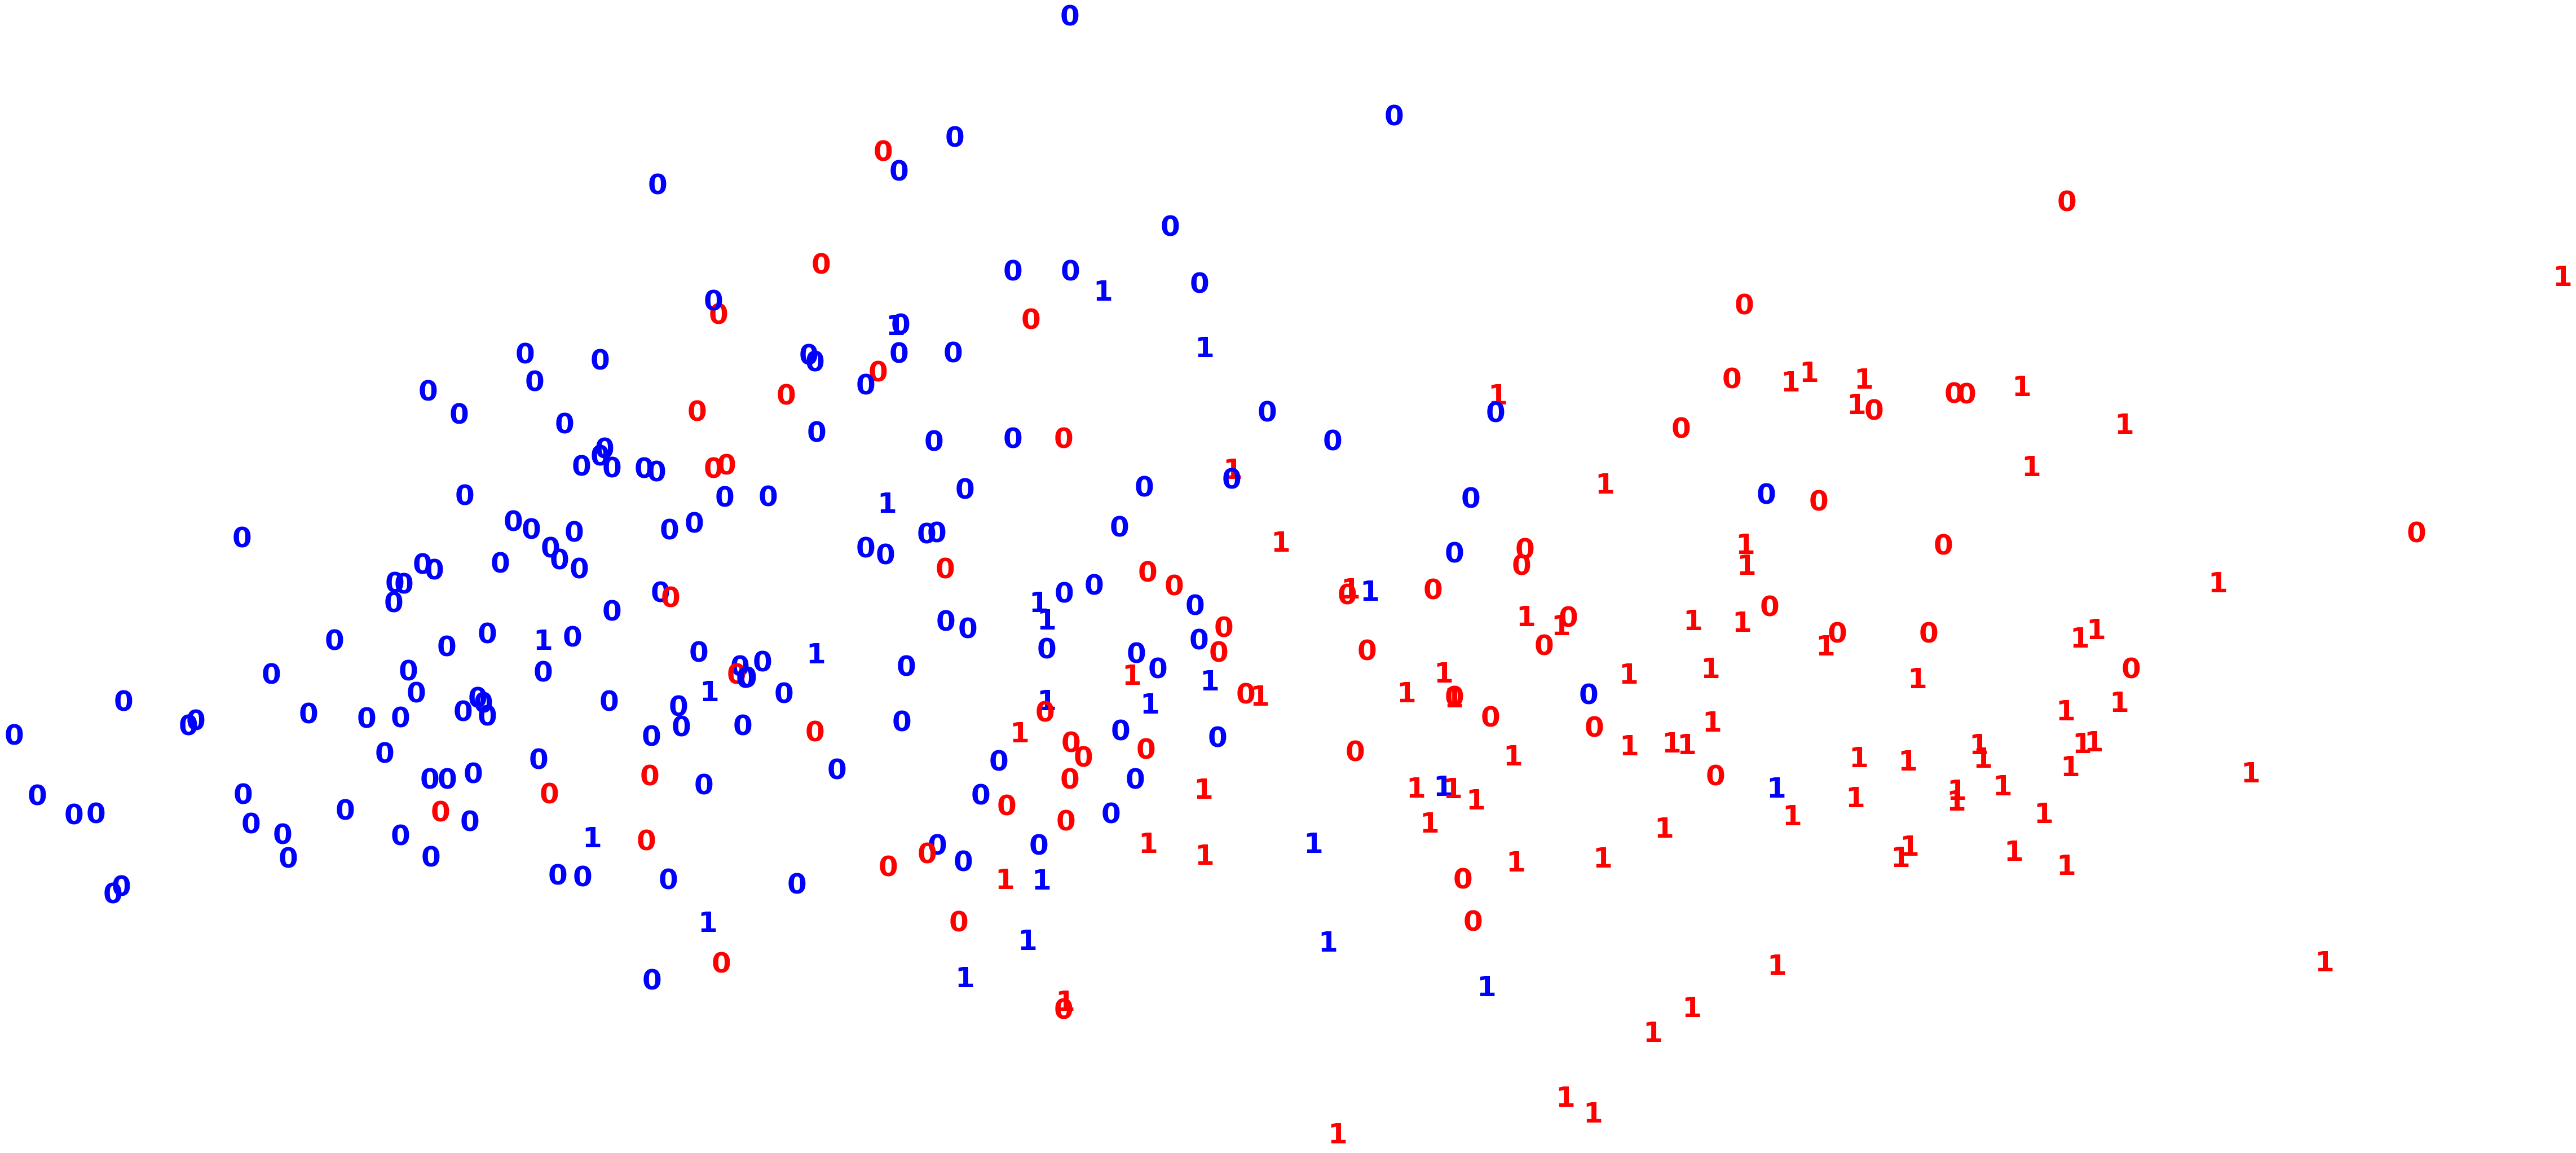

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445


In [19]:
from sklearn.mixture import GaussianMixture

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)



plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

#### k-means has the best scores in both ARI and silhoutte, while GMM has the worst scores.

# 2. 
#### GMM implementation of scikit-learn has a parameter called covariance_type. This parameter determines the type of covariance parameters to use. Specifically, there are four types you can specify:

1. full: This is the default. Each component has its own general covariance matrix.
2. tied: All components share the same general covariance matrix.
3. diag: Each component has its own diagonal covariance matrix.
4. spherical: Each component has its own single variance.

In [22]:
for cov_type in ['full', 'tied', 'diag', 'spherical']:
    gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type=cov_type)

    # Fit model
    clusters = gmm_cluster.fit_predict(X_std)



    # plt.figure(figsize=(10,5))
    # colours = 'rbg'
    # for i in range(pca.shape[0]):
    #     plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
    #              color=colours[y[i]],
    #              fontdict={'weight': 'bold', 'size': 50}
    #         )

    # plt.xticks([])
    # plt.yticks([])
    # plt.axis('off')
    # plt.show()

    print(cov_type)
    print("Adjusted Rand Index of the GMM solution: {}"
          .format(metrics.adjusted_rand_score(y, clusters)))
    print("The silhoutte score of the GMM solution: {}"
          .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

full
Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445
tied
Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445
diag
Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445
spherical
Adjusted Rand Index of the GMM solution: 0.20765243525722465
The silhoutte score of the GMM solution: 0.12468753110276873


#### Among the four covairance type, mode 'full', 'tied', diag' have the same performance. While 'soherical' mode has the better ARI scores but lower silhoutte score.